# Symbolic computation of the joint

The three vector $A$, $B$ and $C$ define two jointive segments $AB$ and $BC$. $I$ is the inner point of the intersection of the corridors. $Q$ is a vector which bissect the two segments and is perpendicular to $B$

In [93]:
UA = {Ax, Ay, Az}
UB = {Bx, By, Bz}
UC = {Cx, Cy, Cz}
UQ = {Qx, Qy, Qz}

{Ax, Ay, Az}
{Bx, By, Bz}
{Cx, Cy, Cz}
{Qx, Qy, Qz}

$V$ is a vector on the $BQ$ bissector, parametrized by $t$

In [113]:
UV = UB * Cos[t] + UQ * Sin[t]

{Bx Cos[t] + Qx Sin[t], By Cos[t] + Qy Sin[t], Bz Cos[t] + Qz Sin[t]}

$L$ is the projection of V on the segment $AB$

In [114]:
ULZ = Cross[UA, UB] / Sqrt[ Cross[UA, UB].Cross[UA, UB] ] // Simplify;

In [115]:
ULY = Cross[ULZ, UV] / Sqrt[ Cross[ULZ, UV].Cross[ULZ, UV] ] // Simplify;

In [116]:
ULX = Collect[ Cross[ULY, ULZ] // Expand, { Sin[2*t], Cos[2*t], Sin[t], Cos[t]}, Simplify ];

We can compute the value of the angle between $V$ and $L$

2     2     2     2    2     2
Sqrt[((Bx  + By  + Bz ) (Az  (Bx  + By ) - 2 Ax Az Bx Bz - 2 Ay By (Ax Bx + Az Bz) + 
 
            2    2     2      2    2     2         2
>         Ay  (Bx  + Bz ) + Ax  (By  + Bz )) Cos[t]  + 
 
                                                                 2     2
>      (-2 Ax Az (Bx By Qy Qz + By Qx (Bz Qy - By Qz) + Bx Bz (Qx  + Qz )) + 
 
            2    2    2     2                      2    2     2
>         Ax  (By  (Qx  + Qy ) + 2 By Bz Qy Qz + Bz  (Qx  + Qz )) + 
 
            2                    2    2     2      2    2     2
>         Az  (2 Bx By Qx Qy + Bx  (Qx  + Qz ) + By  (Qy  + Qz )) + 
 
            2    2    2     2                      2    2     2
>         Ay  (Bx  (Qx  + Qy ) + 2 Bx Bz Qx Qz + Bz  (Qy  + Qz )) - 
 
                             2     2
>         2 Ay (Ax (Bx By (Qx  + Qy ) + Bx Bz Qy Qz + Bz Qx (-(Bz Qy) + By Qz)) + 
 
                     2                                           2     2           2
>            Az (-(Bx  Qy Qz) + Bx Qx (Bz Qy + By Qz) + By Bz (Qy  + Qz )))) Sin[t]  - 
 
>      2 (Ay Az By Bz + Ax Bx (Ay By + Az Bz)) (Bx Qx + By Qy + Bz Qz) Sin[2 t] + 
 
          2    2     2      2    2     2      2    2     2
>      (Az  (Bx  + By ) + Ay  (Bx  + Bz ) + Ax  (By  + Bz )) (Bx Qx + By Qy + Bz Qz) 
 
>       Sin[2 t]) / 
 
        2    2     2                                                2    2     2
>    (Az  (Bx  + By ) - 2 Ax Az Bx Bz - 2 Ay By (Ax Bx + Az Bz) + Ay  (Bx  + Bz ) + 
 
         2    2     2
>      Ax  (By  + Bz ))]
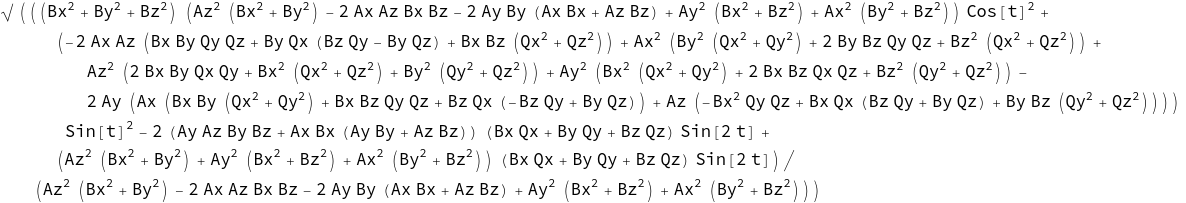

In [37]:
LeftArcP = (ULX.UV) // Expand // Simplify

And make some simplification assuming:

* $B$ is a unit vector
* $B$ is perpendicular to $Q$ (by construction)

2                           2       2
ArcCos[Sqrt[Cos[t]  - ((Ax Qx + Ay Qy + Az Qz)  Sin[t] ) / 
 
          2         2                                                2         2
>      (Ay  (-1 + By ) + 2 Ax Az Bx Bz + 2 Ay By (Ax Bx + Az Bz) + Az  (-1 + Bz ) - 
 
           2    2     2
>        Ax  (By  + Bz ))]]
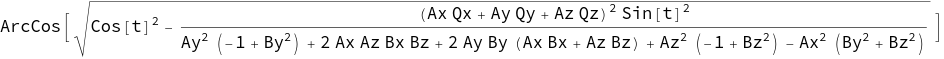

In [39]:
LeftArc = Assuming[
    Bx^2+By^2+Bz^2 == 1,
Assuming[
    Bx*Qx+By*Qy+Bz*Qz == 0,
    Collect[ ArcCos[ LeftArcP ], { Sin[2*t], Cos[2*t], Sin[t], Cos[t]}, FullSimplify ]
]]

{P1 -> Ix Qx + Iy Qy + Iz Qz, P2 -> Bx Ix + By Iy + Bz Iz, 
 
                                   2
>   R1 -> -((Ax Qx + Ay Qy + Az Qz)  / 
 
           2         2                                                2         2
>       (Ay  (-1 + By ) + 2 Ax Az Bx Bz + 2 Ay By (Ax Bx + Az Bz) + Az  (-1 + Bz ) - 
 
            2    2     2
>         Ax  (By  + Bz )))}
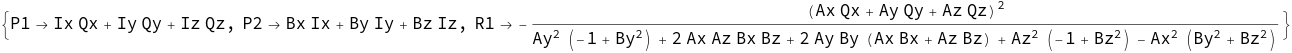

In [21]:
sub = {
    P1 -> (Ix*Qx + Iy*Qy + Iz*Qz),
    P2 -> (Ix*Bx + Iy*By + Iz*Bz),
    R1 -> -(Ax*Qx + Ay*Qy + Az*Qz)^2 / (Ay^2*(-1+By^2) + 2*Ax*Az*Bx*Bz + 2*Ay*By*(Ax*Bx+Az*Bz) +Az^2*(-1+Bz^2) - Ax^2*(By^2+Bz^2))
}

2
ArcCos[Sqrt[R1 + (1 - R1) Cos[t] ]]
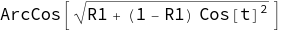

In [128]:
LeftEqua = ArcCos[ Sqrt[ R1 + (1 - R1)*Cos[t]^2 ] ]

In [129]:
CentEqua = P1 * Sin[t] + P2 * Cos[t]

P2 Cos[t] + P1 Sin[t]

Inverse functions are being used by `1`, so some solutions may not be found; use Reduce for complete solution information.: Inverse functions are being used by Solve, so some solutions may not be found; use Reduce for complete solution information.

2                                     2
                 Sqrt[R1 - Cos[d] ]                    Sqrt[R1 - Cos[d] ]
{{t -> -ArcCos[-(------------------)]}, {t -> ArcCos[-(------------------)]}, 
                   Sqrt[-1 + R1]                         Sqrt[-1 + R1]
 
                                  2                                  2
                  Sqrt[R1 - Cos[d] ]                 Sqrt[R1 - Cos[d] ]
>   {t -> -ArcCos[------------------]}, {t -> ArcCos[------------------]}}
                    Sqrt[-1 + R1]                      Sqrt[-1 + R1]
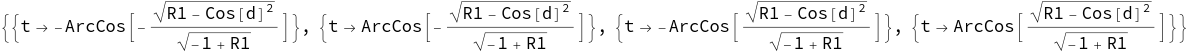

In [130]:
resEqua = Solve[ LeftEqua == d, t ]

2
         Sqrt[R1 - Cos[d] ]
ArcCos[-(------------------)]
           Sqrt[-1 + R1]
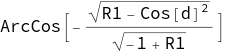

In [131]:
tsol1 = t /. resEqua[[2]] // FullSimplify

2
       Sqrt[R1 - Cos[d] ]
ArcCos[------------------]
         Sqrt[-1 + R1]
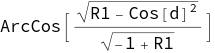

In [132]:
tsol2 = t /. resEqua[[4]] // FullSimplify

In [110]:
val = {
	Ax -> 0.794251719609759,
	Ay -> 0.426305460744861,
	Az -> -0.4329293938231181,
	Bx -> 0.4444565318238356,
	By -> 0.3399936715573496,
	Bz -> 0.8287717988807781,
	Qx -> 0.24661112454861925,
	Qy -> 0.8429853628065601,
	Qz -> -0.47807805988432217
}
vald = { d -> 0.25124028407072047}
valt = { t -> 0.4 }

{Ax -> 0.794252, Ay -> 0.426305, Az -> -0.432929, Bx -> 0.444457, By -> 0.339994, 
 
>   Bz -> 0.828772, Qx -> 0.246611, Qy -> 0.842985, Qz -> -0.478078}
{d -> 0.25124}
{t -> 0.4}

In [133]:
tsol1 /. sub /. val /. vald

2.74159 + 0. I

In [134]:
tsol2 /. sub /. val /. vald

0.4 + 0. I

In [171]:
(R1 - Cos[d]^2) /. sub /. val /. vald
(-1 + R1) /. sub /. val
ArcCos[Sqrt[-R1 + Cos[d]^2]/Sqrt[1 - R1]] /. sub /. val /. vald

-0.345753
-0.407557
0.4

2
       Sqrt[R1 - Cos[d] ]
ArcCos[------------------]
         Sqrt[-1 + R1]
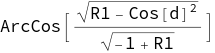

In [159]:
tsol2

In [171]:
ArcCos[Sqrt[-R1 + Cos[d]^2)]/Sqrt[1 - R1]] 

ToExpression::sntx: Invalid syntax in or before "ArcCos[Sqrt[-R1 + Cos[d]^2)]/Sqrt[1 - R1]] ".
                                                        ^

$Failed

2                                                 2
{0.352207 Sqrt[0.592443 + Cos[d] ] + 0.246611 Sqrt[1 - 0.627966 (0.592443 + Cos[d] )], 
 
                                   2
>   0.269426 Sqrt[0.592443 + Cos[d] ] + 
 
                                                  2
>    0.842985 Sqrt[1 - 0.627966 (0.592443 + Cos[d] )], 
 
                                   2                                                 2
>   0.656754 Sqrt[0.592443 + Cos[d] ] - 0.478078 Sqrt[1 - 0.627966 (0.592443 + Cos[d] )]}
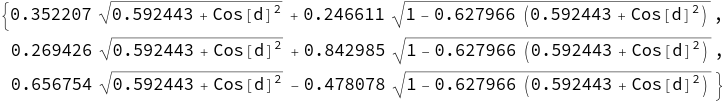

In [103]:
UV /. resEqua[[4]] /. sub /. val

In [119]:
ULX /. sub /. val /. valt

{0.651511, 0.441738, 0.616767}

In [126]:
LeftArc /. sub /. val /. valt

0.25124

In [127]:
LeftEqua /. sub /. val /. valt

0.25124